# **Numerical Analysis Project - Week 3**
*Mathilde Bénard, Hector Giraud, Emilie Soret - TEAM 5, GROUP E*

---

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

**As explained by our teacher, some of the questions were difficult to answer this week so he asked us to do the best we can and to keep working on the problems this week. As a result, some of the questions might be unfinished but we tried to answer to as many as possible.**

For our team : E.5, we have to consider the following problem 

$$ \begin{cases}
\partial_t u = \beta \partial^2_x u \\
u(t, x=0)=a \\
u(t=0,x)=u_1 cos(\frac{\pi x}{2L}) \\
\partial_x(t,x=L)=0
\end{cases}$$

$$\forall J \in \N, \text{we define } \\
h=\frac{L}{J+1} \\
\forall j \in [1,J], x_j=jh $$

##### **(a). Is it an ODE or a PDE? Is it linear, homogeneous, autonomous?**

This is a **partial differential equation (PDE)** because it involves partial derivatives with respect to both time $t$ and space $x$.
Yes, it is a **linear PDE** because the function $u$ and its derivatives appear only in the first degree and there are no nonlinear terms (such as  $u^2$ or $(\partial_x u)^2$).
The **PDE itself is homogeneous** (since the right-hand side is zero). However, the boundary conditions introduce an inhomogeneity (due to $u(t, x=0) = a$, where  $a > 0$), making the full IBVP **inhomogeneous**.
Yes, the PDE is **autonomous** because the coefficients do not explicitly depend on time  $t$.

 
##### **(b). Implement finite differences in space (forward for the first derivative at L, centered for the second derivative) to define a multidimensional IVP. Show that this method converges.**
Let 
$$J \in \N \\
\text{We define} \\
h_x = \frac{L}{J+1} \\
\forall j \in \llbracket 1, J \rrbracket, x_j = jh \\$$

To implement the scheme we do the following approximations : 

(Forward difference at L): We need to define an extra point for u at x=L+h. We define it s.t. 
 $$\partial_x(t,x=L) \approx \frac{u(t,x=L+h)-u(t,x=L)}{h}=0 \\ \text{which implies that} \\
 u(t, x=L+h)=u(t,x=L)$$ 

 (Centered difference) $$\forall x \in [0,L], \forall t \in [0,T] \\ \partial^2_x u(t,x) \approx \frac{u(t,x+h)+u(t,x-h)-2u(t,x)}{h^2}$$

 This gives us the following discretized problem

 $$ \forall t \in [0,T], \forall j \in \llbracket 1, J+1 \rrbracket \\
    \begin{cases}
    v_0(t)=a \\
    \frac{v_{J+1}(t)-v_J(t)}{h}=0 \\
    v'_j(t)=\beta \frac{v_{j+1}(t)+v_{j-1}-2v_j(t)}{h^2} \\
    v_j(0)=u_1 cos(\frac{\pi x_j}{2L})\\
    \end{cases}$$
    
with 
    $$ (v_j)_{j \in \llbracket 1, J+1 \rrbracket} \in (\R^{\R_+})^{j \in \llbracket 1, J+1 \rrbracket}$$

which can be rewritten in matrix form as 

$$ \begin{cases}
\forall t \in [0,T], V'(t)=\frac{-\beta}{h^2}AV(t)+F \\
V(0)=U_0
\end{cases}$$
with 
$$ V(0)= \begin{bmatrix}
v_1(0) \\
\vdots \\
v_{J+1}(0) \end{bmatrix} \\~\\
V(t)= \begin{bmatrix}
v_1(t) \\
\vdots \\~\\
v_{J+1}(t) \end{bmatrix} \\~\\
V'(t)= \begin{bmatrix}
v'_1(t) \\
\vdots \\
v'_{J+1}(t) \end{bmatrix} \\~\\
A= \begin{bmatrix}
 2 & -1 &  & & 0 \\
 -1 & 2 & -1 &  &  \\
  & \ddots & \ddots & \ddots &  \\
 &  & -1 & 2 & -1\\
0 &  &  & -1 & 1\\ \end{bmatrix} \\~\\
F= \begin{bmatrix}
\frac{\beta a}{h_x^2} \\
0 \\
\vdots \\
0 \end{bmatrix} \\~\\
U_0= \begin{bmatrix}
u^0(x_1) \\
\vdots \\~\\
u^0(x_{J+1}) \end{bmatrix} = \begin{bmatrix}
u_1cos(\frac{\pi x_1}{2L} )\\
\vdots \\~\\
u_1cos(\frac{\pi x_{J+1}}{2L}) \end{bmatrix}\\~\\$$



In [ ]:
# Implementation
def FDS(L,a,u1, J,b, T):
    h=L/(J+1)
    F= np.append(b*a/h**2, np.zeros(J)).reshape(J+1,)
    D=((-1)*np.eye(J+1, k=-1)+2*np.eye(J+1)-1*np.eye(J+1,k=1))
    D[J][J]-=1
    V0=np.array([u1*np.cos((np.pi*j*h)/(2*L)) for j in range(1,J+2)])
    def f(t,X):
       return np.dot((-b)/(h**2)*D,X)+F
    return solve_ivp(f,(0,T),V0, t_span=)

[9.99879063e-01 9.99516282e-01 9.98911745e-01 9.98065597e-01
 9.96978044e-01 9.95649348e-01 9.94079831e-01 9.92269872e-01
 9.90219910e-01 9.87930440e-01 9.85402015e-01 9.82635248e-01
 9.79630808e-01 9.76389421e-01 9.72911871e-01 9.69198999e-01
 9.65251704e-01 9.61070940e-01 9.56657719e-01 9.52013108e-01
 9.47138229e-01 9.42034263e-01 9.36702445e-01 9.31144062e-01
 9.25360461e-01 9.19353039e-01 9.13123250e-01 9.06672601e-01
 9.00002652e-01 8.93115016e-01 8.86011359e-01 8.78693400e-01
 8.71162908e-01 8.63421705e-01 8.55471663e-01 8.47314705e-01
 8.38952804e-01 8.30387983e-01 8.21622313e-01 8.12657914e-01
 8.03496955e-01 7.94141651e-01 7.84594265e-01 7.74857107e-01
 7.64932532e-01 7.54822939e-01 7.44530775e-01 7.34058529e-01
 7.23408733e-01 7.12583964e-01 7.01586840e-01 6.90420021e-01
 6.79086207e-01 6.67588140e-01 6.55928602e-01 6.44110411e-01
 6.32136428e-01 6.20009547e-01 6.07732703e-01 5.95308864e-01
 5.82741036e-01 5.70032258e-01 5.57185605e-01 5.44204183e-01
 5.31091132e-01 5.178496

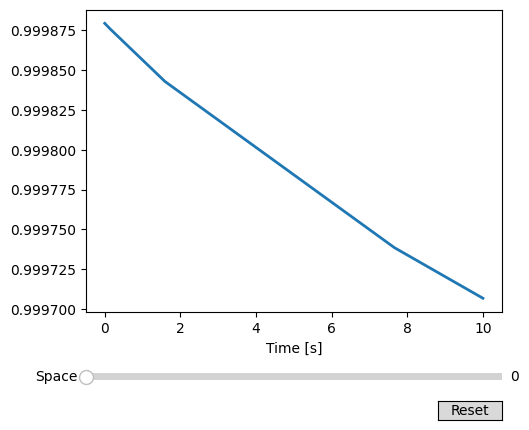

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button, Slider

L=100
a=1
u1=1
J=100
b=0.1
T=10

sol = FDS(L,a,u1, J,b, T)
t=sol.t

# The parametrized function to be plotted
def f(t,x):
    return sol.y[x,:]

# Define initial parameters
init_x = 0

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t,init_x), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
space_slider = Slider(
    ax=axfreq,
    label='Space',
    valmin=0,
    valmax=L,
    valinit=init_x,
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, space_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
space_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    space_slider.reset()
button.on_clicked(reset)

plt.show()

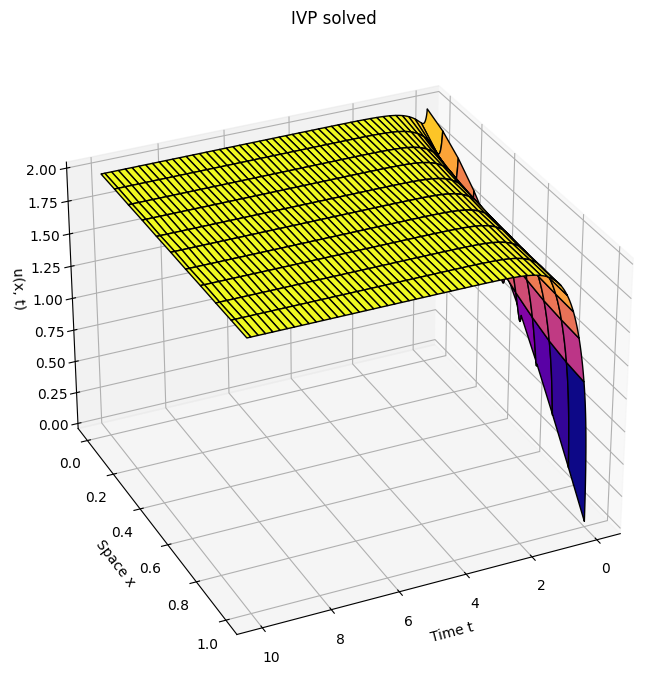

In [4]:


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sol = FDS(1, 2, 2, 10, 1,10)
x=np.linspace(0,1,sol.y.shape[0])
# Plotting for 

# Create meshgrid for plotting
T_mesh, X_mesh = np.meshgrid(sol.t, x)

# 3D Surface Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T_mesh, X_mesh, sol.y, cmap='plasma', edgecolor='k')

ax.set_xlabel('Time t')
ax.set_ylabel('Space x')
ax.set_zlabel('u(x, t)')
ax.set_title('IVP solved')



ax.view_init(30, 65)
plt.tight_layout()
plt.show()

**Consistency**

Let $\epsilon (t)$ = $U'(t)$ + $\frac{\beta}{h^2}AU(t) - F = \begin{bmatrix}
\epsilon_1(t) \\
\vdots \\
\epsilon_J(t) \end{bmatrix} $

Let  ${j \in \llbracket 2, J-1 \rrbracket}$

$$\epsilon_j(t) = u'(t)_j - \frac{\beta}{h_x^2}(u_\text{j+n}^t+u_\text{j-n}^t - 2u_j^t)$$

Here the notation " ' " exceptionnally refers to a space derivative.

$$u_\text{j+n}^t = u_j^t + hu'^t_j + \frac{h^2}{2}u''^t_j + \frac{h^3}{6}u'''^t_j + \frac{h^4}{24}u''''^t_{\theta -}$$
$$u_\text{j-n}^t = u_j^t - hu'^t_j + \frac{h^2}{2}u''^t_j - \frac{h^3}{6}u'''^t_j + \frac{h^4}{24}u''''^t_{\theta +}$$

with ${\theta_+},{\theta_-} \in [x_j, x_{j+1}]$. We make the $h^2$ go on the other side.

$$\frac{u_{j+h}^t + u_{j-h}^t - 2u_j^t}{h^2} = u''^t_j + \frac{h^2}{24}(u''''^t_{\theta +} + u''''^t_{\theta -})$$

$$\epsilon_j(t) = \underbrace{\partial_t u_j^t - \beta \partial_x^2 u_j^t}_{=0} + \frac{\beta h^2}{24}(\partial_x^4u^t_{\theta +} + \partial_x^4u^t_{\theta -})$$

$$\lvert \epsilon_j(t) \rvert \leq \frac{\beta h_x^2}{12}\underbrace{\lVert \delta_x^4 u(t,\cdot)\rVert _\text{$\infty$, [0,L]}}_{\in \mathbb{R}_+}$$

as $u(t,\cdot)$ is continuous on a segment.

$$\lVert \epsilon_j(t) \rVert \leq  \frac{\beta h_x^2}{12}\lVert \delta_x^4 u(t,\cdot)\rVert _\text{$\infty$, [0,L]}$$

**Stability**

1- Let us show that 
$E'(t)= \epsilon(t) - \frac{\beta}{h_x^2}AE(t)$(1)

$$\begin {split}
 E'(t) &  = U'(t)-V'(t) \\
   &  = \epsilon(t) - \frac{\beta}{h_x^2}AU(t)+F +\frac{\beta}{h_x^2}AV(t)-F \\
& = \epsilon(t) - \frac{\beta}{h_x^2}A (U(t)-V(t)) \\
 &    = \epsilon(t) - \frac{\beta}{h_x^2}A E(t) \\
    \end{split}$$
    
2- Let us solve (1) using the varying constant method: \
We look for the function $ E \in (\R^{J+1})^{\R_+}$ in the shape $E(t)=e^{-\frac{\beta}{h_x^2}At}Y(t)$ with $Y \in (\R^{J+1})^{\R_+}$ differentiable. 
(1) rewrites 

$$\begin{split}
E'(t) &=  \epsilon(t) - \frac{\beta}{h_x^2}AE(t) \\
-\frac{\beta}{h_x^2}A e^{-\frac{\beta}{h_x^2}At}Y(t)+ Y'(t)e^{-\frac{\beta}{h_x^2}At} & = \epsilon(t) - \frac{\beta}{h_x^2}AE(t)\\
Y'(t)e^{-\frac{\beta}{h_x^2}At} & = \epsilon(t) \\
Y'(t) & = e^{\frac{\beta}{h_x^2}At}\epsilon(t)
\end{split}$$

Solving for Y we get 

$$\begin{split}
Y'(t) & = e^{\frac{\beta}{h_x^2}At}\epsilon(t) \\
\int_0^t Y'(s) ds & = \int_0^t e^{\frac{\beta}{h_x^2}As}\epsilon(s) ds \\
Y(t)-Y(0) & = \int_0^t e^{\frac{\beta}{h_x^2}As}\epsilon(s) ds \\
\end{split}$$
Since $Y(0)=E(0)=0$, we finally have
$Y(t) = \int_0^t e^{\frac{\beta}{h_x^2}As}\epsilon(s) ds$

Hence $\forall t \in [0,T], E(t)= \int_0^t e^{\frac{\beta}{h_x^2}A(t-s)}\epsilon(s) ds$ (2)

3- From (2), $\forall t \in [0,T]$
$$\begin{split}
||E(t)||_2& = ||\int_0^t e^{\frac{\beta}{h_x^2}A(t-s)}\epsilon(s) ds||_2\\
||E(t)||_2& \leqslant \int_0^t ||e^{\frac{\beta}{h_x^2}A(t-s)}\epsilon(s)||_2 ds \\
||E(t)||_2& \leqslant \int_0^t |||e^{\frac{\beta}{h_x^2}A(t-s)}|||_2||\epsilon(s)||_2 ds (3)\\
\end{split}$$

In exercise 11, we showed that $\forall S \in Sym_{J}(\R), e^{-\alpha St}  \in Sym_{J}(\R)$ for some $\alpha \in \R$
Hence, as $A \in Sym_{J}(\R),  e^{\frac{\beta}{h_x^2}A(t-s)} \in Sym_{J}(\R)$ and $|||e^{\frac{\beta}{h_x^2}A(t-s)}|||_2= max\{sp(e^{\frac{\beta}{h_x^2}A(t-s)})\}$\
Let $\lambda \in sp(A)$ s.t. $|\lambda|= max\{sp(A)\}$. \
We also showed that $e^{\frac{\beta}{h_x^2}|\lambda|(t-s)}=max\{sp(e^{\frac{\beta}{h_x^2}A(t-s)})\}$. Hence (3) rewrites 
$$\begin{split}
||E(t)||_2& \leqslant \int_0^t e^{\frac{\beta}{h_x^2}|\lambda|(t-s)} ||\epsilon(s)||_2 ds \\
||E(t)||_2& \leqslant \int_0^t e^{\frac{\beta}{h_x^2}|\lambda|(t-s)} \underset{s\in[0,T]}{sup}||\epsilon(s)||_2 ds \\
||E(t)||_2& \leqslant  \underset{s\in[0,T]}{sup}||\epsilon(s)||_2 \int_0^t e^{\frac{\beta}{h_x^2}|\lambda|(t-s)} ds \\
\end{split}$$
$\forall t \in [0,T], \forall s \in [0,t], \frac{\beta}{h_x^2}|\lambda|(t-s) \geqslant 0$ \
Hence $\int_0^t e^{\frac{\beta}{h_x^2}|\lambda|(t-s)} ds \leqslant \int_0^t 1 ds \leqslant t \leqslant T$ and 
$$\begin{split}
||E(t)||_2& \leqslant  \underset{s\in[0,T]}{sup}||\epsilon(s)||_2 T \\
||E(t)||_2& \leqslant  CTh_x^2 
\end{split}$$

Hence as $||E(t)||_2 \leqslant  CTh_x^2 \underset{J \to \infty}{\longrightarrow} 0$, the scheme is convergent with respect to the infinite norm. 

c) Let $N \in \N$ and $T \in \R^+$ To implement Euler's forward scheme in time we define \
$h_t=\frac{T}{N+1} \\
\forall n \in \llbracket 1,N \rrbracket, t^n = nh_t $ \
We approximate $ \forall n \in \llbracket 1,N \rrbracket, V'(t^n) \approx \frac{V(t^{n+1})-V(t^n)}{h}$. \
From now on, $\forall n \in \llbracket 1,N \rrbracket$, we denote $V(t^{n})=V^n$\
\
We obtain the following discretized problem \
$\begin{cases} 
V^0=U^0 \\
\forall n \in \llbracket 1,N \rrbracket, V^{n+1}=(\frac{-h_t \beta}{h_x^2}A + I_{J+1})V^n +h_tF 
\end{cases}$


**Consistency**

The **consistency error** is defined as:

$$
\mathcal{E}^n = \frac{U^{n}-U^{n-1}}{h_t}+\frac{\beta}{h_x^2}AU^{n-1} -F $$

From the **Taylor-Lagrange theorem**, for all $n \in [1, N+1]$, let $\theta_1^n, ..., \theta_J^n \in [t^{n-1}, t^n]$ such that:

$$
U^{n} = U^{n-1} + h_t \begin{bmatrix} \partial_t u (t^{n-1}, x_1) \\ \vdots \\ \partial_t u (t^{n-1}, x_J) \end{bmatrix} + \frac{h_t^2}{2} \begin{bmatrix} \partial_t^2 u (\theta_1^n, x_1) \\ \vdots \\ \partial_t^2 u (\theta_J^n, x_J) \end{bmatrix} = U^{n-1} + h_t \partial_t U^{n-1} + \frac{h_t^2}{2}U(\theta^n).
$$
Combining this with the definition of the consistency error of the finite difference scheme
$$ \begin{split}
\mathcal{E}^n & =\partial_t U^{n-1}+\frac{h_t}{2}U(\theta^n)+\frac{\beta}{h_x^2}AU^{n-1} -F\\
\mathcal{E}^n & =\epsilon (t^{n-1})+\frac{h_t}{2}U(\theta^n)\\~\\
||\mathcal{E}^n||_{\infty} & \leqslant ||\epsilon (t^{n-1})||_{\infty}+ ||\frac{h_t}{2}U(\theta^n)||_{\infty}\\
 & \leqslant \underset{t \in [0, T]}{sup}||\epsilon (t)||_{\infty}+ \frac{h_t}{2} \underset{j \in \llbracket 1, J+1  \rrbracket}{sup} |\partial_t^2 u (\theta_j^n, x_j)|\\
  & \leqslant \underset{t \in [0, T]}{sup}||\epsilon (t)||_{\infty}+ \frac{h_t}{2} ||\partial^2_tu||_{\infty, [0,T]\times[0,L]}\\
\underset{n}{max}||\mathcal{E}^n||_{\infty} & \leqslant \frac{h_x^2}{12} ||\partial^4_xu||_{\infty, [0,T]\times[0,L]}+ \frac{h_t}{2} ||\partial^2_tu||_{\infty, [0,T]\times[0,L]}\\
 & \leqslant h_x^2C' + C''h_x^2
\end{split}$$

**Stability**
Drawing on exercise 11, to show stability, we will show that the following propositons are equivalent 


(i) $\exists K \geqslant 0, \forall J \in \N, \forall N \in \N, \forall (z^n)_{0 \leqslant n \leqslant N+1}, (w^n)_{0 \leqslant n \leqslant N+1}, (\eta^n)_{0 \leqslant n \leqslant N+1} \in (\R^{J+1})^{N+2}: $ \
$\begin{cases} 
w^0=z^0+h_t \eta^0 \\
\forall n \in \llbracket 1, N \rrbracket, z^{n+1}=(\frac{-h_t \beta}{h_x^2}+I_{J+1})z^n +F \\
\forall n \in \llbracket 1, N \rrbracket, w^{n+1}=(\frac{-h_t \beta}{h_x^2}+I_{J+1})w^n +F + h_t\eta^{n+1} \\
\end{cases}$ 

$\implies \underset{0 \leqslant n \leqslant N+1}{max}||z^n -w^n||_2 \leqslant \underset{0 \leqslant n \leqslant N+1}{max} ||\eta^n||_{\infty}$

(ii) $\forall J \in \N, |||(\frac{-h_t \beta}{h_x^2}A+I_{J+1})|||_2 = |||\Beta|||_2 \leqslant 1$

(iii) tbd

(iv) tbd

**(ii) $\implies$ (i)**

Suppose (ii)
Let $n \in \llbracket 1, N \rrbracket$,

$$\begin{split}
w^{n}-z^{n} & =\Beta (w^{n-1}-z^{n-1})+h_t\eta^{n} \\

 & = \Beta (\Beta (w^{n-2}-z^{n-2})+h_t\eta^{n-1})+h_t\eta^{n} \\
 & = \Beta^{n}(w^0-z^0) +h_t \sum \limits^{n}_{k=0}(\Beta^{n-k}\eta^k)  \\
 \end {split}$$ 
 
 
 by induction 
 Since $w^0-z^0=0$, we obtain, \
$\forall n \in \llbracket 1, N \rrbracket, w^{n}-z^{n}=h_t \sum \limits^{n}_{k=0}\Beta^{n-k}\eta^k \\$ 

$$\begin{split}
||w^{n}-z^{n}||_2 & =||h_t \sum \limits^{n}_{k=0}\Beta^{n-k}\eta^k||_2\\
& \leqslant h_t \sum \limits^{n}_{k=0}||\Beta^{n-k}\eta^k||_2\\
& \leqslant h_t \sum \limits^{n}_{k=0}|||\Beta^{n-k}|||_2||\eta^k||_2\\
& \leqslant h_t \sum \limits^{n}_{k=0}1||\eta^k||_2\\
& \leqslant h_t \sum \limits^{n}_{k=0}1 \underset{0 \leqslant n \leqslant N+1}{max}||\eta^n||_2\\
& \leqslant h_t (n+1) \underset{0 \leqslant n \leqslant N+1}{max}||\eta^n||_2\\
\underset{0 \leqslant n \leqslant N+1}{max}||w^{n}-z^{n}||_2 &  \leqslant h_t (N+2) \underset{0 \leqslant n \leqslant N+1}{max}||\eta^n||_2\\
&  \leqslant 2T \underset{0 \leqslant n \leqslant N+1}{max}||\eta^n||_2\\
\end{split}$$
Hence (ii) $\implies$ (i)

**(i) $\implies$ (ii)**

Let us proceed by contraposition and suppose that $|||\Beta||| = max\{|sp(\Beta)|\} \geqslant 1$ 
Let $\lambda = max\{|sp(\Beta)|\}$ and $z^0$ the eigenvector associated with $\lambda$
Define the sequence $(z_n)_{0 \leqslant n \leqslant N+1}$ s.t. $\forall n \in \llbracket 0, N \rrbracket, z^{n+1}=Bz^n i.e. z^n=\Beta^n z^0 = \lambda^n z^0$ by induction and the definition of $z^0$
Let $w=(0, \cdots, 0)$ and $\eta = (-z^0, 0, \cdots, 0) \in \R^{N+1}$
Those sequences verify (i). Moreover, $\forall n \in \llbracket 0, N \rrbracket$, 

$||z^n-w^n||_2 = ||z^n||_2 = |\lambda|^n ||z^0||_2 $


As $|\lambda| \geqslant 1 $ by hypothesis, 

$\underset{0 \leqslant n \leqslant N+1}{max}||z^n-w^n||_2 = ||z^n||_2 = |\lambda|^{N+1} ||z^0||_2 
\leqslant \underset{0 \leqslant n \leqslant N+1}{max}||\eta^n||_{\infty}=||z^0||_{\infty} \\
\underset{N \to \infty}{lim} (\underset{0 \leqslant n \leqslant N+1}{max}||z^n-w^n||_2) = \infty \geqslant \underset{N \to \infty}{lim}||z^0||_{\infty} = ||z^0||_{\infty}  $

This is a contradiction. Hence (i) $\implies $(ii)


---

Following the hint of the teacher, let 
$$N= \begin{bmatrix}
 1 & -1 &  & & 0 \\
 -1 & 2 & -1 &  &  \\
  & \ddots & \ddots & \ddots &  \\
 &  & -1 & 2 & -1\\
0 &  &  & -1 & 1\\ \end{bmatrix} ~~~~ A= \begin{bmatrix}
 2 & -1 &  & & 0 \\
 -1 & 2 & -1 &  &  \\
  & \ddots & \ddots & \ddots &  \\
 &  & -1 & 2 & -1\\
0 &  &  & -1 & 1\\ \end{bmatrix}~~~~ C= \begin{bmatrix}
 1 &  &  & & 0 \\
  & 0 &  &  &  \\
  &  & \ddots & &  \\
 &  &  & 0 & \\
0 &  &  &  & 0\\ \end{bmatrix} \in \mathcal Mat_{J+1}(\R) \\~\\$$

$A=N+C$ 
and from exercise 14, 
$sp(N) \subseteq \R_+$ 
so N is a semi definite positive matrix i.e. 
$\forall V \in \R^{J+1}, V^TNV \geqslant 0$ \\
Let us show that A is positive definite. Let $V = \begin{bmatrix} v_0 \\ \vdots \\ v_{J+1} \end{bmatrix} \in \R^{J+1}$
$$\begin{split} 
V^TAV & = V^T(N+C)V \\
& = V^TNV +V^TCV \\
& = V^TAV + v_0^2 \\
& \geqslant 0\end{split}$$

Now let us show that    $\forall V \in \R^{J+1} \ 0, V^TAV > 0$     i.e.    $(V^TAV=0) \implies V=0$
Let $V = \begin{bmatrix} v_0 \\ \vdots \\ v_{J+1} \end{bmatrix} \in \R^{J+1}$ s.t.
$$\begin{split} 
V^TAV & = 0 \\
V^TNV + v_0^2 & = 0~~~~ (1)
\end{split}$$

Since $V^T(N)V \geqslant 0$ and $v_0^2 \geqslant 0$, 

$(1) \iff v_0^2=V^TNV=0$
$$\begin{split} \\
~~   & V^TNV          = 0 \\
\iff & VV^TNV        = 0\\ 
\iff & ||V||_2^2 N V  =0 \\
\end{split}$$
so $||V||_2^2V \in ker(N)= \R 1$

Let $\alpha \in \R s.t \forall j \in \llbracket 1, J+1 \rrbracket, v_j = \alpha$ 

Since $v_0=0, \alpha=0$ and V=0. Hence A is definite positive.

Using the other hint we have:

Let $A = B + C$.

We define the spectral radius as:

$$
\rho(B) = \sup_{\|x\|=1} x^T B x
$$

Let $v$ be the vector where the supremum is attained.

Thus, we have:

$$
v^T A v = v^T B v + v^T C v
$$

Since $C$ is positive semidefinite, we know:

$$
v^T C v \geq 0
$$

Then, 

$$
v^T A v \geq v^T B v
$$

Taking the supremum on both sides:

$$
\sup v^T A v \geq \sup v^T B v
$$

Thus:

$$
\rho(A) \geq \rho(B)
$$

If $C$ is strictly positive definite (i.e., $v^T C v > 0$ for some $v$), then $\rho(A) > \rho(B)$.

---

We assume that $D = A + C$, which implies:

$$
\rho(D) \geq \rho(A)
$$

We obtain:

$$
\underbrace{| \min \operatorname{sp}(A) |}_{= \min \operatorname{sp}(A)} \leq \rho(A) < \rho(D)
$$

Since $A$ is positive definite, we have:

$$
1 - h_t \beta \min \operatorname{sp}(A) \geq 1 - h_t \beta \rho(A) > 1 - h_t \beta \rho(D)
$$

Assuming that all values are positive:

$$
| 1 - h_t \beta \lambda_{J} | \leq | 1 - h_t \beta \rho(A) | \leq \underbrace{| 1 - h_t \beta \min \operatorname{sp}(A) |}_{=\rho(I_{s+1} - h_t \beta A) }
$$

From (ii)
$$
\rho(I_{s+1} - h_t \beta A) = ||| I_{J+1} - h t \beta A |||_2 \leq 1          
$$

Thus:

$$
1 - h_t \beta \lambda_{J} \leq ||| I_{J+1} - h_t \beta A |||_2 \leq 1
$$

which implies:

$$
-1 < 1 - h_t \beta \lambda_{J} < 1
$$

which is (iii)

<br>

$(iii) \implies (iv)$

$$
-1 < 1 - h_t \beta \lambda_{J} < 1
$$

$$
\iff h_t \beta \lambda_{J} < 2
$$

From this, we analyze $\forall J$:

$$
h_t \beta \frac{4}{h_x^2}\underbrace{{\sup_{J \in \mathbb{N}} \sin^2 \left( \frac{J \pi}{2(J + 1)} \right)}}_{1} \leq 2
$$

which simplifies to:

$$
\frac{h_t \beta}{h_x^2} \leq \frac{1}{2}
$$




**Convergence**

We assume that the CFL condition (iv) is true
Thus the stability condition (i) is verified. 
Let us apply it to $z^n=V^n, w^n=U^n$ and $\eta ^n=\mathcal E^n$

$$\begin{split}
\underset{n}{max}||U^n-V^n||_2 & \leqslant  K \underset{n}{max}||\mathcal E^n||_{\infty}\\
\underset{n}{max}||\mathcal E^n||_2 & \leqslant Ch_t+C'h_x^2 ~~~\text{             from consistency}\\
 & \leqslant C \frac{h_x^2}{2 \beta}+ C'h_x^2 \\
 & \underset{J\to \infty}{\longrightarrow} 0

\end{split}$$
Hence the scheme is convergent for the 2 norm iff the CFL condition is true 

In [ ]:
#Implementation
def matrices(T,beta, L,J, N, a):
   h_t=T/(N+1)
   h_x=L/(J+1)
    
   I = np.eye(J+1)
   A = 2*np.eye(J+1)-1*np.eye(J+1, k=-1)-1*np.eye(J+1, k=1)
   A[J][J]-=1
   B = ((-h_t*beta)/(h_x**2))*A+I
   F= np.append(h_t*beta*a/h_x**2, np.zeros(J)).reshape(J+1,)
   return B,F

def euler_forward(T,beta, L,J, N, a):
    h_t=T/(N+1)
    h_x=L/(J+1)
    if (h_t*beta)/(h_x**2)>=1/2:
       print("The CFL condition is not met. The algorithm will not converge")
       return None
    else: 
      B, F = matrices(T,beta, L,J, N, a)
      x=np.linspace(0,L,J+2)
      t=np.linspace(0,T,N+2)
      V=np.zeros((J+1,N+1))
      V=np.insert(V, 0, [a*np.cos((np.pi*xn)/(2*L)) for xn in x[1:]], axis=1)
      for n in range(N+1):
         V[:,n+1]=np.dot(B,V[:,n])+F
      V=np.insert(V, [0], [a], axis=0)
      return V,t, x

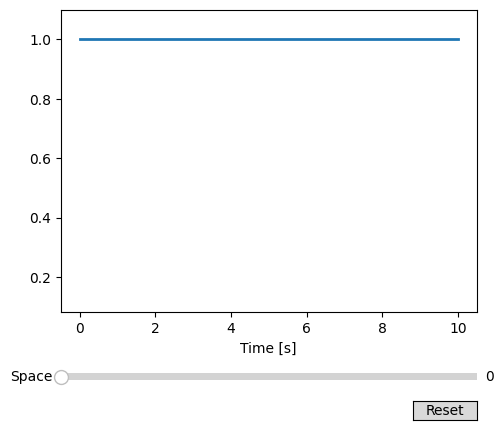

In [28]:
#Plotting with slider along the x coordinates

import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider

T=10
beta=1e-3
L=1
J=20
N=150
a=1

V,t,x = euler_forward(T,beta, L,J, N, a)

# The parametrized function to be plotted
def f(t,x):
    return V[x,:]

# Define initial parameters
init_x = 0

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t,init_x), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
space_slider = Slider(
    ax=axfreq,
    label='Space',
    valmin=0,
    valmax=L,
    valinit=init_x,
)
h_x=L/(J+1)
# The function to be called anytime a slider's value changes

all_y = np.array([f(t, i) for i in range(J+1)])
global_min = np.min(all_y)
global_max = np.max(all_y)

ax.set_ylim(global_min * 1.1, global_max * 1.1)  # Add some padding

def update(val):
    idx = int(val / h_x)
    idx = min(max(idx, 0), J)
    y_data = f(t, idx)
    line.set_ydata(y_data)
    fig.canvas.draw_idle()


# register the update function with each slider
space_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    space_slider.reset()
button.on_clicked(reset)

plt.show()

In [ ]:
#Plotting with slider along the t coordinates

import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider

T=10
beta=1e-3
L=1
J=20
N=150
a=1

V,t,x = euler_forward(T,beta, L,J, N, a)

# The parametrized function to be plotted
def f(t,x):
    return V[:,t]

# Define initial parameters
init_t = 0

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(init_t,x), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
space_slider = Slider(
    ax=axfreq,
    label='Time',
    valmin=0,
    valmax=T,
    valinit=init_t,
)
h_t=T/(N+1)
# The function to be called anytime a slider's value changes

all_y = np.array([f(i, x) for i in range(N+1)])
global_min = np.min(all_y)
global_max = np.max(all_y)

ax.set_ylim(global_min * 1.1, global_max * 1.1)  # Add some padding

def update(val):
    idx = int(val / h_t)
    idx = min(max(idx, 0), N)
    y_data = f(idx, x)
    line.set_ydata(y_data)
    fig.canvas.draw_idle()


# register the update function with each slider
space_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    space_slider.reset()
button.on_clicked(reset)

plt.show()

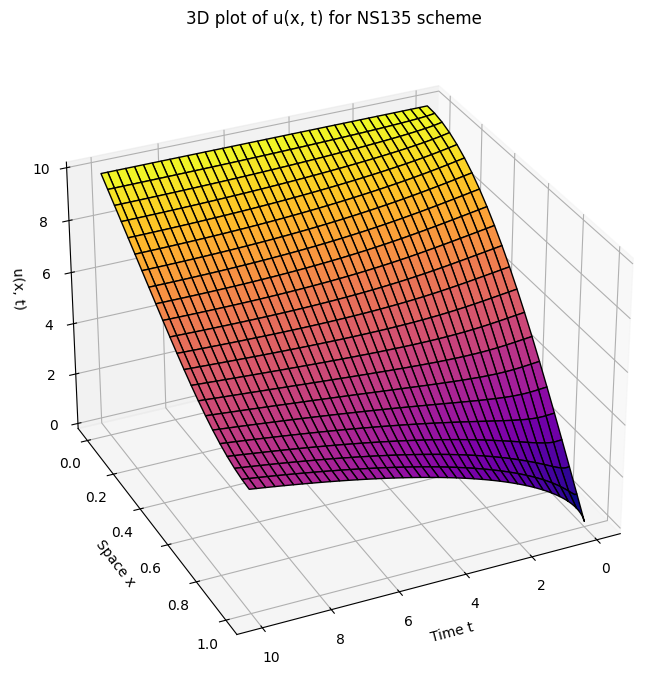

In [ ]:
#Plotting in 3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
T=10
beta=1e-3
L=1
J=20
N=150
# Plotting for 
V, t, x = euler_forward(T,0.01, L,J, N, 10)
# Create meshgrid for plotting
T_mesh, X_mesh = np.meshgrid(t, x)

# 3D Surface Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T_mesh, X_mesh, V, cmap='plasma', edgecolor='k')

ax.set_xlabel('Time t')
ax.set_ylabel('Space x')
ax.set_zlabel('u(x, t)')
ax.set_title('3D plot of u(x, t) for NS135 scheme')



ax.view_init(30, 65)
plt.tight_layout()
plt.show()